In [1]:
#from IPython.display import Audio, display
#import urllib.request
import numpy as np
#import scipy.stats
#import seaborn as sns
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio, display
#import scikit_posthocs as sp
#import matplotlib.pyplot as plt
#from matplotlib import gridspec
#from matplotlib.transforms import BlendedGenericTransform
#import scikit_posthocs as sp
#from urllib.request import urlopen
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
def draw(fname, path):
    wav, rate = librosa.core.load("Assets\\DataShareArchive\\Test\\" + path + "\\" + fname)
    fft = librosa.stft(wav)
    print (path)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(fft), ref=np.max), y_axis='log', x_axis='time')
    Audio(wav, rate=rate)
    return fft


clean


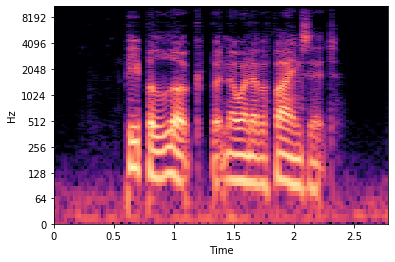

In [8]:
wav, rate = librosa.core.load("Assets\\DataShareArchive\\Test\\clean\\p232_010.wav")

c_f = draw("p232_010.wav", "clean")


noisy


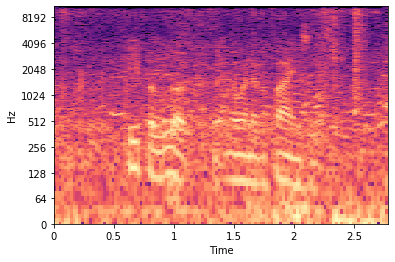

In [4]:
n_f = draw("p232_010.wav", "noisy")

In [37]:
diff = n_f - c_f
reclean = n_f - diff
real_clean = c_f.real + 1j * c_f.imag


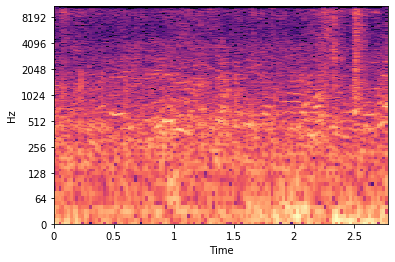

In [34]:
librosa.display.specshow(librosa.amplitude_to_db(np.abs(diff), ref=np.max), y_axis='log', x_axis='time')

In [32]:
def check(ar):
    print(ar[1,1], ar.real[1,1], ar.imag[1,1])

t = c_f.real + 1j * c_f.imag
#check(c_f)
#check(t)
print("c")
print(c_f[0:2,0:2])
print("r")
print(c_f.real[0:2,0:2])
print("i")
print(c_f.imag[0:2,0:2])
print("sum")
print(t[0:2,0:2])


c
[[ 1.1930732 +0.000000e+00j  1.1045941 +0.000000e+00j]
 [-0.44121704-8.326673e-17j -0.74783725-9.265893e-02j]]
r
[[ 1.1930732   1.1045941 ]
 [-0.44121704 -0.74783725]]
i
[[ 0.000000e+00  0.000000e+00]
 [-8.326673e-17 -9.265893e-02]]
sum
[[ 1.1930732 +0.000000e+00j  1.1045941 +0.000000e+00j]
 [-0.44121704-8.326673e-17j -0.74783725-9.265893e-02j]]


In [38]:
round_trip = librosa.istft(real_clean)
Audio(round_trip, rate=rate)

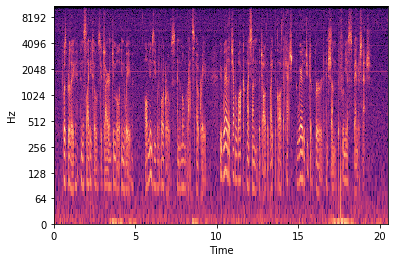

In [28]:
jab, rate =librosa.core.load("Assets\\DaveJabberwocky.wav")
Audio(jab, rate=rate)
X = librosa.stft(jab)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(X), ref=np.max), y_axis='log', x_axis='time')


In [29]:
round_trip = librosa.istft(X)
Audio(round_trip, rate=rate)

In [37]:
# This is supposed to be better but sounds like crap
hop_length = 64
C = librosa.cqt(jab, sr=rate,hop_length=hop_length)
y_hat = librosa.icqt(C=C, sr=rate, hop_length=hop_length)
Audio(y_hat, rate=rate)